<a href="https://colab.research.google.com/github/Tizzy1999/ml2019/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://medium.com/@yehjames
# https://medium.com/machine-learning-101
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Interpretability of Decision Tree**:
在真实环境中模型的“可解释性”是很重要的，而决策树就是一个解释性能力很强的模型

![alt text](https://miro.medium.com/max/549/1*GXefHTYamFu1I-ngFUXb3Q.png)

* 训练过程中决策树会问出一系列的问题像是温度是否〉125，湿度是否〉5%之类的是非问题。
* 首先从树根的特征开始将数据分割到不同边，分割的原则是：这样的分割要能懂得到最大的资讯增益（Information Gain）


##**Information Gain**：

![alt text](https://miro.medium.com/max/722/1*FjGUfcYt_Vyupv1KfNm_pA.png)

* 由于我们希望获得的资讯量要最大，因此经由分割后的资讯量要越小越好。
*　常见的资讯量有两种：熵(Entropy) 以及Gini不纯度(Gini Impurity)


##**Entropy**:
![alt text](https://miro.medium.com/max/914/1*_otZEQ9iVAJirblwdVnIIw.png)

##**Gini Impurity**:
![alt text](https://miro.medium.com/max/1234/1*WXHY6siVegJRKcFqxCRSYQ.png)







In [0]:
# Iris Dataset
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##**Data Preprocessing**:

In [0]:
iris = datasets.load_iris()
# get the features data frame
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
print("target_names: "+str(iris['target_names']))
# get the traget data frame
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()
# there're in total three targets, but in this case
# we focus only on the first two categories
# 'setosa' and 'versicolor'

target_names: ['setosa' 'versicolor' 'virginica']


,target
0,0
1,0
2,0
3,0
4,0


In [0]:
# combine feaaturs and target columns
iris_data = pd.concat([x,y],axis=1)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# extract the two features and one target
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)','target']]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [0]:
# extract the target with value 0 and 1
# only the first two categories
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(5)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


##**Model Training**:

In [0]:
# spliting the dataset, 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)', 'petal length (cm)']],
    iris_data[['target']],
    test_size=0.3,
    random_state=0
)

In [0]:
# loading the decision tree classifier
# setting max_depth for preventing overfitting
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion ='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

##**Model Evaluation**:

In [0]:
y_pred = tree.predict(X_test)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrixm)

[[15  0]
 [ 0 15]]


In [0]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [0]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
                feature_names=['sepal length (cm)', 'petal length (cm)'])

In [0]:
# The following functions define the plot of the decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


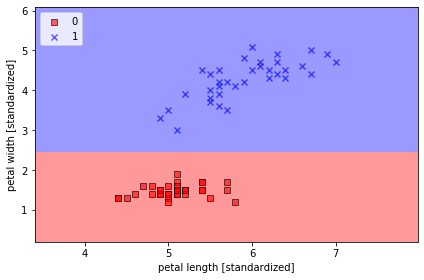

In [0]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()